<a href="https://colab.research.google.com/github/jaguzman/FundamentosEnHerramientasDeTransformacionDigital/blob/master/Unidad%203%20-%20Aprendizaje%20de%20m%C3%A1quinas/3_Aprendizaje%20No%20Supervisado/Actividad_K_Means_y_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means y PCA!

**Datos de Clientes en un Centro Comercial**

Se cuenta con una base de datos de las tarjetas de membresía de un centro comercial. Se tienen algunos datos básicos de los clientes: edad, género, ingresos mensuales y puntaje de gastos. La puntuación de gasto es algo que se le asigna al cliente en función de sus compras y los tipos de compra.

Información del dataset: base de datos de Udemy https://github.com/SteffiPeTaffy/machineLearningAZ/blob/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv

**OBJETIVO**

Realizar un análisis de segmentación de clientes usando el algoritmo no supervisado k-Means. Al final del ejercicio podrá comprender a los clientes y quién de ellos pueder ser un objetivo para el equipo de marketing y poder así generar estrategias de comercialización.


**ACTIVIDAD**

1. Importar librerías
2. Importar la base de datos
3. Realizar la descripción y analítica de datos
4. Preparar de los datos para el algoritmo
5. Realizar una reducción de las características con PCA
6. Clusterizar los datos con K-Means
7. Realizar una visualización gráfica de la segmentación de clientes


# **1. IMPORTAR LIBRERÍAS**

In [2]:
# Importar las librerías
import pandas as pd
import numpy as np

# Librerías para graficar
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
import matplotlib.gridspec as gridspec
import math

# Librerías de Aprendizaje de máquinas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# **2. IMPORTAR LA BASE DE DATOS**

In [3]:
# Leer los datos desde el GitHub
data = pd.read_csv(
    "https://raw.githubusercontent.com/jaguzman/dataSets/master/datasets/Mall_Customers.csv",
    sep = ',',         # Se especifica el separador de los datos
    thousands = None,  # Se especifica el separador de miles
    decimal = '.')     # Se especifica el separador de los decimales

# Imprimir el tamaño de la base de datos
print(data.shape)
# Imprimir las primeras líneas
data.__()

(200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**DESCRIPCIÓN DE LA BASE DE DATOS**

**Datos bancarios del cliente**

**[1] CustomerID:** número de identificación asignado al cliente  (numérico)

**[2] Genre:** género del cliente (categórico) [Male, Female]

**[3] Age:** edad del cliente (numérico)

**[4] Annual Income (k$):** ingresos económicos anuales del cliente \$US (numérico)

**[5] Spending Score (1-100):** Puntaje asignado al cliente, por el centro comercial, basado en el comportamiento del cliente y la naturaleza de los gastos (numérico)

In [ ]:
# Información de la base de datos: nómbre de la columba, conteo de datos Null y tipo de datos
data.__()
# La base de datos no tiene datos nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# **3. DESCRIPCIÓN Y ANALÍTICA DE DATOS**

Graficar la cantidad de personas por su género

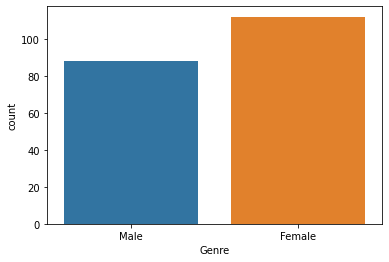

In [ ]:
# Esta función realiza una suma de cada categorías y luego las grafica ('Genre')
sns.countplot(data['__']) 

In [ ]:
# Descripción de los datos numéricos
data.__()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Ver la distribución de los datos de la las variables numéricas 'Age', 'Annual Income (k$)' y 'Spending Score (1-100)'.

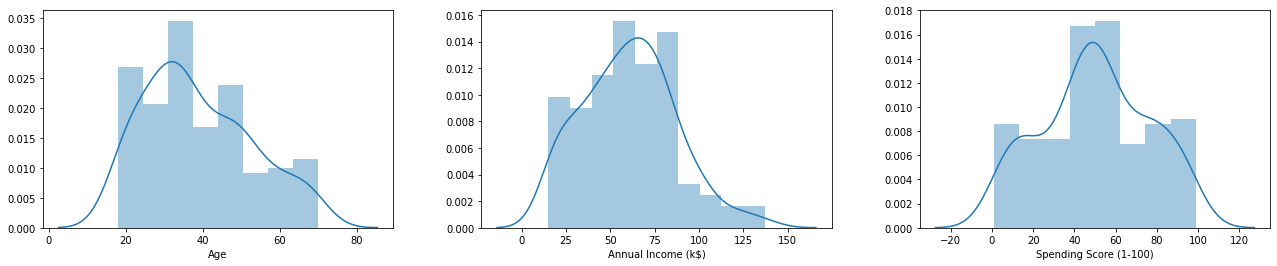

In [ ]:
# Definición de figura con 3 gráficas de 1x3 y se define el tamaño de la figura
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (22,4))
# Gráfica 1: distribución de los valores de Age
sns.distplot(data['Age'], ax = ax1)
# Gráfica 2: distribución de los valores de Annual Income (k$)
sns.distplot(data['__'], ax = ax2)
# Gráfica 3: distribución de los valores de Spending Score (1-100)
sns.distplot(data['__'], ax = ax3)

plt.subplots_adjust(wspace=0.25)

*   La edad más común en los clientes es de 30-50 años.
*   Son más comunes los clientes viejos que los clientes jóvenes.
*   Se puede inferir que pocas personas ganan más de \$100.000 dólares al año. 
*   La mayoría de las personas ganan entre 50-75 mil dólares.
*   Las personas que menos ganan están al rededor de \$20.000 dolares.


# **4. PREPARACIÓN DE LOS DATOS PARA EL ALGORITMO**

Pasar de variables categorica a variable numéricas

In [5]:
# Funcion para cambiar los valores de 'Male=1' y 'Female=0'

# Definición de la función LabelEncoder
encoder = LabelEncoder()
# Realizar la conversión a todas las variables categoricas asignandóles un número iniciando desde 0
data['Genre'] = encoder.fit_transform(data['__'])
# Imprimir los primeros 5 datos de la base de datos
data.__()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
# Se elimina la colimna 'CustomerID'
data = data.drop(columns=['__'])
# Imprimir los primeros 5 datos de la base de datos
data.__()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# **5. REDUCCIÓN DE CARACTERÍSTICAS PCA**

In [ ]:
#%% PCA

pca = PCA(n_components = 2, whiten= True )  # whitten = normalize
pca.fit(data)

x_pca = __.transform(data)

print("variance ratio: ", pca.explained_variance_ratio_)
print("sum: ",sum(pca.explained_variance_ratio_))

variance ratio:  [0.45118077 0.44091539]
sum:  0.892096162464606


In [ ]:
#%% 2D
data["p1"] = x_pca[:,0]
data["p2"] = x_pca[:,1]
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),p1,p2
0,1,19,15,39,-1.204343,-1.261528
1,1,21,15,81,0.028890,-2.172916
2,0,20,16,6,-2.169419,-0.501724
3,0,23,16,77,-0.081948,-2.044309
4,0,31,17,40,-1.215836,-1.161648


# **6. CLUSTERIZACIÓN DE LOS DATOS CON K-MEAS**

Para determinar el mejor número de clusters se ejecuta el algoritmo para diferentes valores de K (1-15) y se gráfica el error cuadrático medio (SSE) con respecto a K.

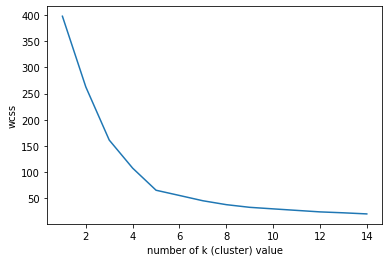

In [ ]:
# %% KMEANS
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[['p1', 'p2']])
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

Se seleccionan 5 grupos, debido a que el "codo" de la gráfica es más evidente en k=5

In [ ]:
# Modelo K-Means de 5 clusters
kmeans_model = KMeans(n_clusters=__)
# Entrenamiento del modelo
clusters = kmeans_model.fit_predict(data[['p1', 'p2']])
# Se agraga una columna con el número del grupo al que pertenece cada cliente
data["cluster"] = clusters
# Imprimir los primeros 5 datos de la base de datos
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),p1,p2,cluster
0,1,19,15,39,-1.204343,-1.261528,4
1,1,21,15,81,0.028890,-2.172916,3
2,0,20,16,6,-2.169419,-0.501724,4
3,0,23,16,77,-0.081948,-2.044309,3
4,0,31,17,40,-1.215836,-1.161648,4


In [ ]:
# Present business interpretation of clusters


def kmeans_present_cluster_stats(data, label, cols = None):
    """
    """
    means = data.groupby(label).mean()
    rows = math.ceil(len(means.columns)/5)
    fig = plt.figure(constrained_layout=False, figsize=(10, rows * 5))
    gs = gridspec.GridSpec(rows, 5, figure=fig)
    i=0
    for col in means.columns:
        if col in cols:
            ax = fig.add_subplot(gs[i])
            if i % 5 == 0:
                ax.set_yticks([i + 0.5 for i in means.index])
                ax.set_yticklabels(['Cluster ' + str(i) for i in means.index])
                ax.set_ylabel('Mean by cluster')
            else:
                ax.set_yticks([])
            ax.set_xticks([0.5])
            ax.set_xticklabels([col], rotation = 45)
            col_t = [[i] for i in list(means[col])] 
            im = ax.pcolormesh(col_t, cmap="RdYlBu_r")
            plt.colorbar(im)
            i+=1
    plt.tight_layout()
    plt.show()

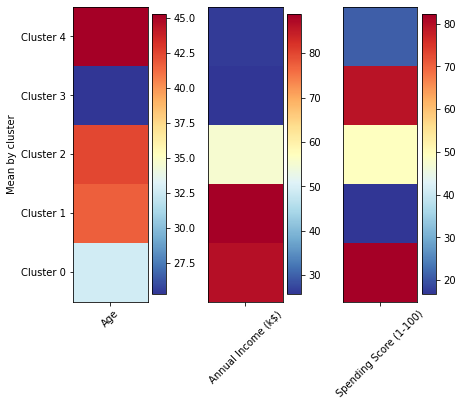

In [ ]:
# Información de cada clúster
kmeans_present_cluster_stats(data = data, label = 'cluster', cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

Nota: el orden de los cluster cambia cada vez que se ejecuta el código.

Interpretación:

Cluster 0 - jóven, bajos ingresos, gastos altos

Cluster 1 - edad preomedio, ingresos promedio, gastos promedio

Cluster 2 - jóven, altos ingresos, altos gastos

Cluster 3 - viejo, bajos ingresos, gastos bajos

Cluster 4 - viejo, altos ingresos, gastos bajos

# **7. GRAFICA DE SEGMENTACIÓN DE CLIENTES**

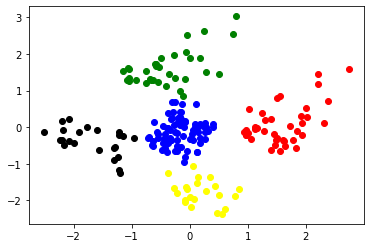

In [ ]:
color = ["red","green", "blue", "yellow", "black"]

for each in range(5):
    plt.scatter(data.p1[data.cluster == each],data.p2[data.cluster == each],color = color[each] )

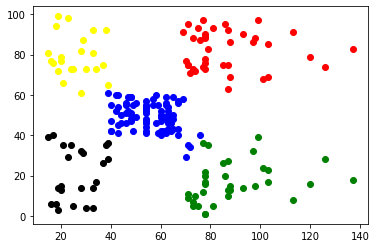

In [ ]:
plt.scatter(data['Annual Income (k$)'][data.cluster == 0 ],data['Spending Score (1-100)'][data.cluster == 0],color = "red")
plt.scatter(data['Annual Income (k$)'][data.cluster == 1 ],data['Spending Score (1-100)'][data.cluster == 1],color = "green")
plt.scatter(data['Annual Income (k$)'][data.cluster == 2 ],data['Spending Score (1-100)'][data.cluster == 2],color = "blue")
plt.scatter(data['Annual Income (k$)'][data.cluster == 3 ],data['Spending Score (1-100)'][data.cluster == 3],color = "yellow")
plt.scatter(data['Annual Income (k$)'][data.cluster == 4 ],data['Spending Score (1-100)'][data.cluster == 4],color = "black")
plt.show()